<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Collinearity-and-Removing-Redundancies" data-toc-modified-id="Collinearity-and-Removing-Redundancies-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Collinearity and Removing Redundancies</a></span><ul class="toc-item"><li><span><a href="#functions-to-test-correlation" data-toc-modified-id="functions-to-test-correlation-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>functions to test correlation</a></span></li><li><span><a href="#Creating-Features" data-toc-modified-id="Creating-Features-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Creating Features</a></span></li><li><span><a href="#Creating-dummy-variables" data-toc-modified-id="Creating-dummy-variables-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Creating dummy variables</a></span><ul class="toc-item"><li><span><a href="#encoding-the-columns" data-toc-modified-id="encoding-the-columns-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>encoding the <code>columns</code></a></span></li></ul></li><li><span><a href="#Checking-the-correlated-values" data-toc-modified-id="Checking-the-correlated-values-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Checking the correlated values</a></span></li><li><span><a href="#Checking-the-correlated-values" data-toc-modified-id="Checking-the-correlated-values-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Checking the correlated values</a></span></li></ul></li><li><span><a href="#Featuring-Engineering" data-toc-modified-id="Featuring-Engineering-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Featuring Engineering</a></span></li></ul></div>

## Collinearity and Removing Redundancies

`Collinearity` means the variables are correlated with each other, that is the variables have the same effects on the model.

**Easiest way to remove** : 

      Draw a correlation matrix, a heatmap that will visually represent the correlation coefficients between the variables.

In [1]:
## loading packages and data

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

import random
import math

In [92]:
pd.set_option("display.max_rows", 1000)
pd.set_option('display.max_columns', 100)

In [2]:
## loading data

data = pd.read_csv("Data/clean_historical_data.csv")
data.head()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
0,4.0,3441.0,4.0,557.0,1239.0,33.0,14.0,21.0,446.0,861.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1900.0,1.0,1400.0,1400.0,1.0,2.0,2.0,446.0,690.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1900.0,1.0,1900.0,1900.0,1.0,0.0,0.0,446.0,690.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.0,6900.0,5.0,600.0,1800.0,1.0,1.0,2.0,446.0,289.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,3900.0,3.0,1100.0,1600.0,6.0,6.0,9.0,446.0,650.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
## laoding the historical data

historical_data = pd.read_csv("Data/historical_data.csv")
historical_data.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,06-02-2015 22:24,06-02-2015 23:27,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,10-02-2015 21:49,10-02-2015 22:56,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,22-01-2015 20:39,22-01-2015 21:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,03-02-2015 21:21,03-02-2015 22:13,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,15-02-2015 02:40,15-02-2015 03:20,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0


In [3]:
data.shape

(177077, 99)

In [4]:
## plotting collinearity plot

## generate a mask for the upper triangle
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

In [6]:
# mask

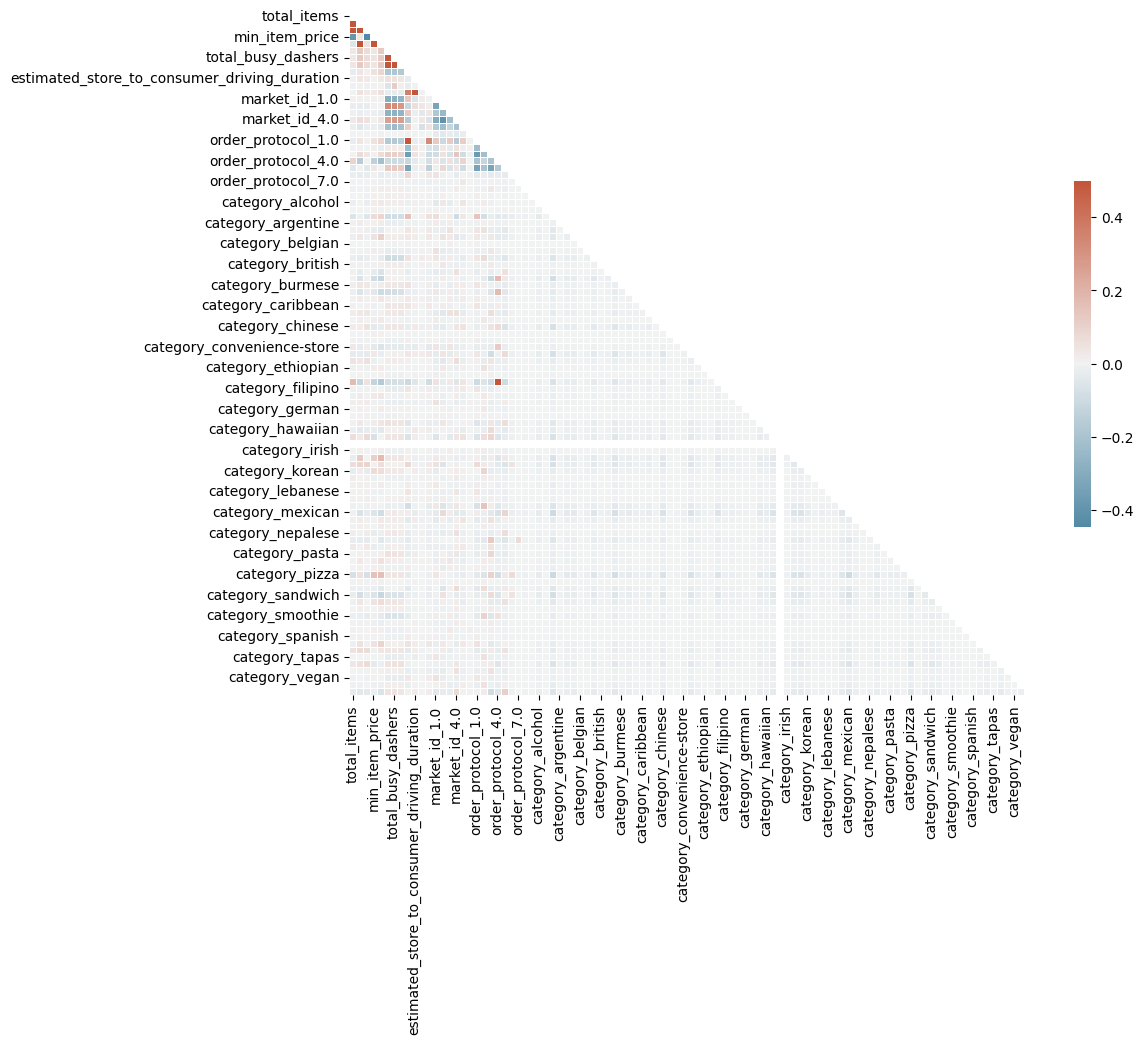

In [12]:
## setup the matplotlib figure
f, ax = plt.subplots(figsize = (11, 9))

## generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True) 

## draw the heatmap with mask and correct aspect ratio
sns.heatmap(corr, mask = mask, cmap = cmap, vmax=0.5, center=0,
            square=True, linewidths=0.5, cbar_kws={'shrink' : 0.5})
plt.show()

In [13]:
## observing the null issues

data['category_hawaiian'].describe()

count    177077.000000
mean          0.008290
std           0.090672
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: category_hawaiian, dtype: float64

### functions to test correlation

* 1. GET REDUNDANT VALUES
* 2. FIND THE TOP CORRELATED FEATURES


In [23]:
## creating redundant pairs

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of the matrix'''
    ## creating set variable to store the data
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

In [24]:
## testing the function, 

len(get_redundant_pairs(df = data))

4950

In [25]:
# get_redundant_pairs(df = data)

In [47]:
## creating find the top correlated features

def get_top_abs_corr_features(df, n):
    '''Get the top absolute correlated features and return n highest results'''
    ## unstacking the correlation value and only considering absolute values
    data_corr = data.corr().abs().unstack()
    ## getting the pairs
    labels_to_drop = get_redundant_pairs(df)
    ## finally sorting in desceding order and dropping the redudant pairs
    data_corr = data_corr.drop(labels = labels_to_drop).sort_values(ascending=False)
    return data_corr[0:n] 

In [48]:
# data.corr().abs().unstack()

In [50]:
get_top_abs_corr_features(df = data, n = 20) 

total_onshift_dashers                         total_busy_dashers          0.941744
                                              total_outstanding_orders    0.934642
total_busy_dashers                            total_outstanding_orders    0.931295
estimated_store_to_consumer_driving_duration  total_non_prep_time         0.923087
estimated_order_place_duration                order_protocol_1.0          0.897649
total_items                                   num_distinct_items          0.758153
subtotal                                      num_distinct_items          0.682892
total_items                                   subtotal                    0.557181
min_item_price                                max_item_price              0.541239
subtotal                                      max_item_price              0.507949
order_protocol_4.0                            category_fast               0.489986
num_distinct_items                            min_item_price              0.446735
mark

After the above result, 

**Conclusion** : 

1. `total_busy_dashers`, `total_onshift_dashers` and `total_outstanding_orders` are highly correlated as expected. 
2. `estimated_store_to_consumer_driving_duration` and `total_non_prep_time` are correlated and we have created the column, `total_non_prep_time`, so we will drop this.
3. `market_id` columns are correlated with each other. 


Now, we will created our `train_data` again from `historical_data` and concat with avaliable dummies to created new `data`.

In [61]:
## creating the new column

historical_data['total_non_prep_time'] = historical_data['estimated_order_place_duration'] + historical_data['estimated_store_to_consumer_driving_duration']
historical_data['total_non_prep_time']

0         1307.0
1         1136.0
2         1136.0
3          735.0
4         1096.0
           ...  
197423     582.0
197424    1166.0
197425    1046.0
197426     830.0
197427     580.0
Name: total_non_prep_time, Length: 197428, dtype: float64

In [57]:
historical_data.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration', 'total_non_prep_time'],
      dtype='object')

In [63]:
historical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 17 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     196441 non-null  float64
 1   created_at                                    197428 non-null  object 
 2   actual_delivery_time                          197421 non-null  object 
 3   store_id                                      197428 non-null  int64  
 4   store_primary_category                        192668 non-null  object 
 5   order_protocol                                196433 non-null  float64
 6   total_items                                   197428 non-null  int64  
 7   subtotal                                      197428 non-null  int64  
 8   num_distinct_items                            197428 non-null  int64  
 9   min_item_price                                19

In [65]:
## changing column types
historical_data['created_at'] = pd.to_datetime(historical_data['created_at'], dayfirst = True)
historical_data['actual_delivery_time'] = pd.to_datetime(historical_data['actual_delivery_time'], dayfirst = True)

### Creating Features

In [66]:
## creating traget_variable for the prediction in the historical_data

historical_data.loc[:, 'actual_total_delivery_duration'] = (historical_data.loc[:, 'actual_delivery_time'] - historical_data.loc[:, 'created_at']).dt.total_seconds()
historical_data.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,total_non_prep_time,actual_total_delivery_duration
0,1.0,2015-02-06 22:24:00,2015-02-06 23:27:00,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,1307.0,3780.0
1,2.0,2015-02-10 21:49:00,2015-02-10 22:56:00,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,1136.0,4020.0
2,3.0,2015-01-22 20:39:00,2015-01-22 21:09:00,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1136.0,1800.0
3,3.0,2015-02-03 21:21:00,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,735.0,3120.0
4,3.0,2015-02-15 02:40:00,2015-02-15 03:20:00,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,1096.0,2400.0


### Creating dummy variables

In [68]:
historical_data['market_id'].nunique()

6

In [69]:
historical_data['store_id'].nunique() 

6743

In [70]:
historical_data['store_primary_category'].nunique()

74

In [71]:
historical_data['order_protocol'].nunique() 

7

#### encoding the `columns`

In [73]:
## market_id column

market_id_dummies = pd.get_dummies(historical_data['market_id'])
market_id_dummies = market_id_dummies.add_prefix("market_id_")
market_id_dummies

,market_id_1.0,market_id_2.0,market_id_3.0,market_id_4.0,market_id_5.0,market_id_6.0
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
197423,1,0,0,0,0,0
197424,1,0,0,0,0,0
197425,1,0,0,0,0,0
197426,1,0,0,0,0,0


In [74]:
## order_protocol columns

order_protocol_dummies = pd.get_dummies(historical_data['order_protocol'])
order_protocol_dummies = order_protocol_dummies.add_prefix('order_protocol_')
order_protocol_dummies

,order_protocol_1.0,order_protocol_2.0,order_protocol_3.0,order_protocol_4.0,order_protocol_5.0,order_protocol_6.0,order_protocol_7.0
0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
197423,0,0,0,1,0,0,0
197424,0,0,0,1,0,0,0
197425,0,0,0,1,0,0,0
197426,1,0,0,0,0,0,0


In [76]:
## store_primary_category has null values

## create a dictionary to store the most repeated category for each store and fill the null values with it

store_id_unique = historical_data['store_id'].unique().tolist()
# store_id_unique

store_id_and_category = {store_id : historical_data[raw_data['store_id'] == store_id]['store_primary_category'].mode()
                         for store_id in store_id_unique}
"""For each store_id, in the list store_id_unique, it's comapring with and then whenever it matches, 
   storing the most common store_primary_category"""

# store_id_and_category[1851].values[0]

"For each store_id, in the list store_id_unique, it's comapring with and then whenever it matches, \n   storing the most common store_primary_category"

In [79]:
## creating a function to fill the null values in the store_primary_category column

def fill(store_id):
    """Return primary store category from the column"""
    try:
        return store_id_and_category[store_id].values[0]
    except:
        return np.nan
    
## fill the null values
historical_data['store_primary_category_updated'] = historical_data['store_id'].apply(fill)

In [80]:
## checking

historical_data[['store_primary_category_updated', 'store_primary_category']].isnull().sum()

store_primary_category_updated     867
store_primary_category            4760
dtype: int64

In [81]:
## encoding the store_primary_category_updated column 

historical_data['store_primary_category_updated'].nunique()

74

In [82]:
## one hot encoding

store_primary_category_dummies = pd.get_dummies(historical_data['store_primary_category_updated'])
store_primary_category_dummies = store_primary_category_dummies.add_prefix('category_')
store_primary_category_dummies

,category_afghan,category_african,category_alcohol,category_alcohol-plus-food,category_american,category_argentine,category_asian,category_barbecue,category_belgian,category_brazilian,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
197424,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
197425,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
197426,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
historical_data.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration', 'total_non_prep_time',
       'actual_total_delivery_duration', 'store_primary_category_updated'],
      dtype='object')

In [99]:
historical_data.shape 

(197428, 19)

In [108]:
## drop the columns, created_at, market_id, store_primary_category, actual_delivery_time, order_protocol from thee historical data

train_data = historical_data.drop(['created_at', 'store_id', 'market_id', 'store_primary_category', 'actual_delivery_time',
                                   'store_primary_category_updated', 'order_protocol'], axis = 1)

In [109]:
train_data.shape

(197428, 12)

In [110]:
## market_id was too much correlated, so will not concat

data = pd.concat([train_data, order_protocol_dummies, store_primary_category_dummies], axis = 1)

## drop highly correlated columns
data.drop(columns = ['total_onshift_dashers', 'total_busy_dashers', 
                     'category_hawaiian', 'total_non_prep_time'], inplace = True)

## align dtype over dataset
data = data.astype('float32')

## replace inf, -inf values with nan and then drop the rows
data.replace([np.inf, -np.inf], np.nan, inplace = True) 
data.dropna(inplace=True)

In [111]:
## shape of the new data

data.shape

(180677, 89)

In [112]:
data.head()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_total_delivery_duration,order_protocol_1.0,order_protocol_2.0,order_protocol_3.0,order_protocol_4.0,order_protocol_5.0,order_protocol_6.0,order_protocol_7.0,category_afghan,category_african,category_alcohol,category_alcohol-plus-food,category_american,category_argentine,category_asian,category_barbecue,category_belgian,category_brazilian,category_breakfast,category_british,category_bubble-tea,category_burger,category_burmese,category_cafe,category_cajun,category_caribbean,category_catering,category_cheese,category_chinese,category_chocolate,category_comfort-food,category_convenience-store,category_dessert,category_dim-sum,category_ethiopian,category_european,category_fast,category_filipino,category_french,category_gastropub,category_german,category_gluten-free,category_greek,category_indian,category_indonesian,category_irish,category_italian,category_japanese,category_korean,category_kosher,category_latin-american,category_lebanese,category_malaysian,category_mediterranean,category_mexican,category_middle-eastern,category_moroccan,category_nepalese,category_other,category_pakistani,category_pasta,category_persian,category_peruvian,category_pizza,category_russian,category_salad,category_sandwich,category_seafood,category_singaporean,category_smoothie,category_soup,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
0,4.0,3441.0,4.0,557.0,1239.0,21.0,446.0,861.0,3780.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1900.0,1.0,1400.0,1400.0,2.0,446.0,690.0,4020.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1900.0,1.0,1900.0,1900.0,0.0,446.0,690.0,1800.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.0,6900.0,5.0,600.0,1800.0,2.0,446.0,289.0,3120.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,3900.0,3.0,1100.0,1600.0,9.0,446.0,650.0,2400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Checking the correlated values

In [113]:
print("Top Absolute Correlations : ")
print(get_top_abs_corr_features(data, 20))

Top Absolute Correlations : 
estimated_order_place_duration  order_protocol_1.0    0.896464
total_items                     num_distinct_items    0.759738
subtotal                        num_distinct_items    0.681388
total_items                     subtotal              0.557365
min_item_price                  max_item_price        0.542614
subtotal                        max_item_price        0.508587
order_protocol_4.0              category_fast         0.489883
num_distinct_items              min_item_price        0.445841
total_items                     min_item_price        0.389311
order_protocol_1.0              order_protocol_3.0    0.373714
estimated_order_place_duration  order_protocol_3.0    0.365044
order_protocol_1.0              order_protocol_5.0    0.341968
estimated_order_place_duration  order_protocol_5.0    0.333631
order_protocol_3.0              order_protocol_5.0    0.329941
order_protocol_1.0              order_protocol_2.0    0.227400
estimated_order_place_dura

**Conclusion**

The `dummy` variables of `order_protocol` column are highly correlated, so let's build out data without concatenating with dummy order_protocol columns

In [119]:
## drop the columns, created_at, market_id, store_id, store_primary_category, actual_delivery_time, order_protocol
train_data = historical_data.drop(['created_at', 'store_id', 'market_id', 'store_primary_category', 'actual_delivery_time',
                                   'store_primary_category_updated', 'order_protocol'], axis = 1)


In [120]:
## due to high correlation, not concluding order_protocol and market_id
data = pd.concat([train_data, store_primary_category_dummies], axis = 1)

In [121]:
## drop highly correlated columns
data.drop(columns = ['total_onshift_dashers', 'total_busy_dashers', 
                     'category_hawaiian', 'total_non_prep_time'], inplace = True)

In [122]:
## align dtype over dataset
data = data.astype('float32')

## replace inf, -inf values with nan and then drop the rows
data.replace([np.inf, -np.inf], np.nan, inplace = True) 
data.dropna(inplace=True)

### Checking the correlated values

In [123]:
print("Top Absolute Correlations : ")
print(get_top_abs_corr_features(data, 20))

Top Absolute Correlations : 
total_items                                   num_distinct_items                0.759738
subtotal                                      num_distinct_items                0.681388
total_items                                   subtotal                          0.557365
min_item_price                                max_item_price                    0.542614
subtotal                                      max_item_price                    0.508587
num_distinct_items                            min_item_price                    0.445841
total_items                                   min_item_price                    0.389311
total_outstanding_orders                      estimated_order_place_duration    0.172443
max_item_price                                category_italian                  0.170333
total_items                                   category_fast                     0.169014
max_item_price                                category_fast                     0

## Featuring Engineering 

**It's a technique to create new variables to simplify the model complexity and increase its accuracy by using the new variables to predict the output**

In [125]:
data.columns

Index(['total_items', 'subtotal', 'num_distinct_items', 'min_item_price',
       'max_item_price', 'total_outstanding_orders',
       'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration',
       'actual_total_delivery_duration', 'category_afghan', 'category_african',
       'category_alcohol', 'category_alcohol-plus-food', 'category_american',
       'category_argentine', 'category_asian', 'category_barbecue',
       'category_belgian', 'category_brazilian', 'category_breakfast',
       'category_british', 'category_bubble-tea', 'category_burger',
       'category_burmese', 'category_cafe', 'category_cajun',
       'category_caribbean', 'category_catering', 'category_cheese',
       'category_chinese', 'category_chocolate', 'category_comfort-food',
       'category_convenience-store', 'category_dessert', 'category_dim-sum',
       'category_ethiopian', 'category_european', 'category_fast',
       'category_filipino', 'category_french', 'category_gastr

In [127]:
## new features

data['percent_distinct_items_of_total'] = data['num_distinct_items']/data['total_items']
data['avg_price_per_item'] = data['subtotal']/data['total_items']

## removing unnecessary columns
data.drop(columns = ['num_distinct_items', 'subtotal'], inplace = True)

## checking the new correlation values
print("Top Correlated Features : ")
print(get_top_abs_corr_features(data, 20))

Top Correlated Features : 
min_item_price                                avg_price_per_item                 0.860931
max_item_price                                avg_price_per_item                 0.771180
min_item_price                                max_item_price                     0.542614
total_items                                   percent_distinct_items_of_total    0.445924
                                              min_item_price                     0.389311
                                              avg_price_per_item                 0.311305
percent_distinct_items_of_total               avg_price_per_item                 0.226397
category_pizza                                avg_price_per_item                 0.224566
max_item_price                                percent_distinct_items_of_total    0.178538
category_fast                                 avg_price_per_item                 0.176810
min_item_price                                percent_distinct_items_of_t

**Conclusion** : 

`min_item_price` and `max_item_price` are highly correlated with `avg_price_per_item`, so let's create new column using `min_item_price` and `max_item_price` and get ride of the high correlation

In [128]:
## new features `price_range`

data['price_range'] = data['max_item_price'] - data['min_item_price']

## dropping unnecessary columns
data.drop(columns = ['max_item_price', 'min_item_price'], inplace = True)

## checking the correlation values after new features addition
print("Top Correlated Features : ")
print(get_top_abs_corr_features(data, 20))

Top Correlated Features : 
total_items                                   percent_distinct_items_of_total    0.445924
                                              price_range                        0.332529
                                              avg_price_per_item                 0.311305
percent_distinct_items_of_total               avg_price_per_item                 0.226397
category_pizza                                avg_price_per_item                 0.224566
category_fast                                 avg_price_per_item                 0.176810
total_outstanding_orders                      estimated_order_place_duration     0.172443
total_items                                   category_fast                      0.169014
estimated_store_to_consumer_driving_duration  actual_total_delivery_duration     0.159415
category_italian                              avg_price_per_item                 0.159404
category_fast                                 percent_distinct_items_of_t

In [129]:
## checking the final_data shape

data.shape

(180677, 81)